In [1]:
import torch
from util import *
from criterion import LossMSE, CrossEntropy

import matplotlib.pyplot as plt
from models import *

torch.set_grad_enabled(False) # VERY IMPORTANT

%matplotlib inline
%load_ext autoreload
%autoreload 2

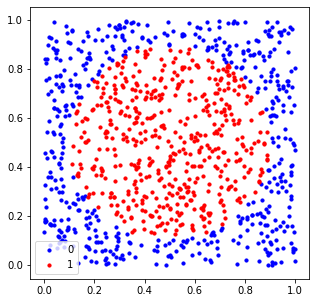

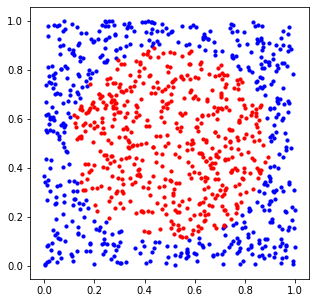

In [2]:
data, labels = generate_disc_set(1000)
validation_data, validation_labels = generate_disc_set(1000)

plot_preds(data, labels)
plt.legend()
plt.savefig("images/dataset.png")
plot_preds(validation_data, validation_labels)

In [3]:
# Global training parameters
nb_epochs = 300
lr = 0.01
mini_batch_size = 100


#####Training model ReLu with Optimizer MSE#####
Epoch 1, loss : 0.9199981689453125
Epoch 31, loss : 0.9199967384338379
Epoch 61, loss : 0.9199557304382324
Epoch 91, loss : 0.565386950969696
Epoch 121, loss : 0.5703458189964294
Epoch 151, loss : 0.5484045147895813
Epoch 181, loss : 0.5390388369560242
Epoch 211, loss : 0.5274701118469238
Epoch 241, loss : 0.5208146572113037
Epoch 271, loss : 0.5174903869628906
Epoch 300, loss : 0.5093692541122437
#####Training model ReLu with Optimizer CrossEntropy#####
Epoch 1, loss : 0.8532631397247314
Epoch 31, loss : 0.8532636165618896
Epoch 61, loss : 0.853264570236206
Epoch 91, loss : 0.8532671332359314
Epoch 121, loss : 0.8587035536766052
Epoch 151, loss : 0.6931304335594177
Epoch 181, loss : 0.6931391954421997
Epoch 211, loss : 0.6931419968605042
Epoch 241, loss : 0.6931433081626892
Epoch 271, loss : 0.6931441426277161
Epoch 300, loss : 0.693144679069519
#####Training model Tanh with Optimizer MSE#####
Epoch 1, loss : 0.6883933544158936
Epoch 31

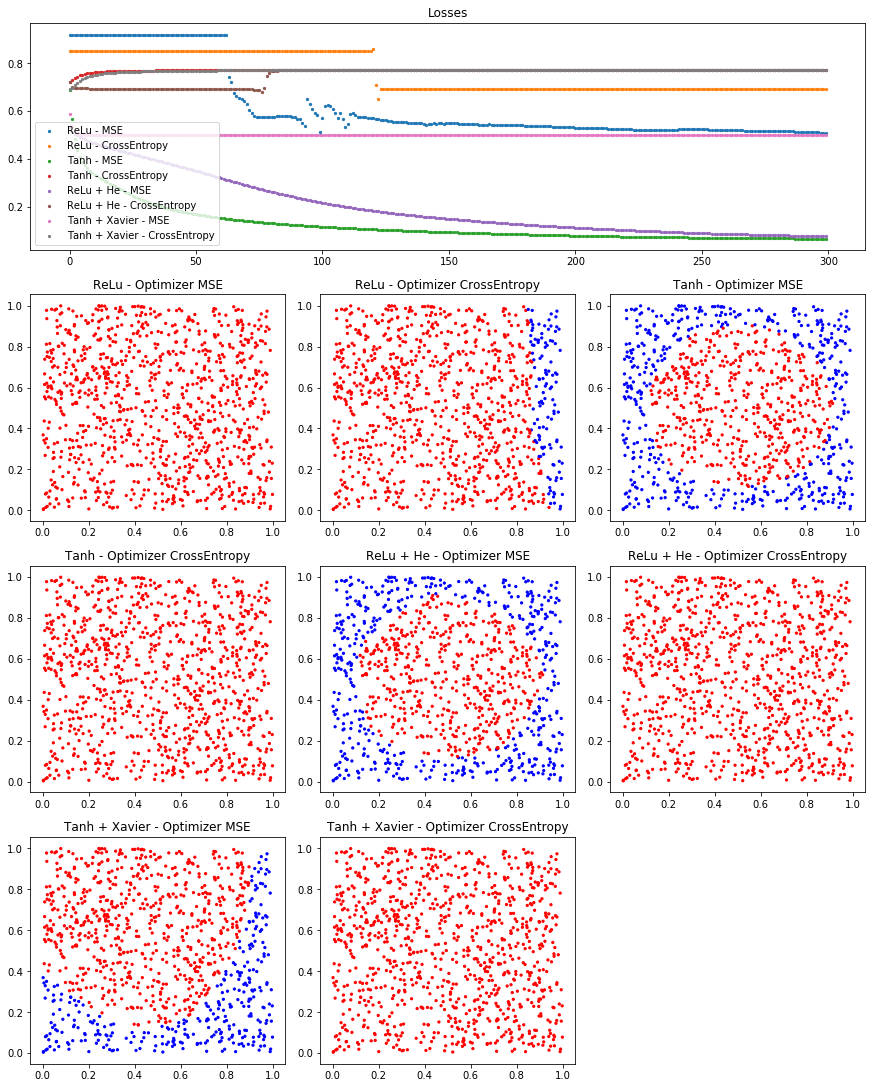

In [13]:
fig3 = plt.figure(constrained_layout=True, figsize=(12,15))
gs = fig3.add_gridspec(4, 3)
ax_losses = fig3.add_subplot(gs[:1, :])
ax_losses.set_title('Losses')
ax_mod1 = fig3.add_subplot(gs[1, 0])

ax_mod2 = fig3.add_subplot(gs[1, 1])
ax_mod3 = fig3.add_subplot(gs[1, 2])
ax_mod4 = fig3.add_subplot(gs[2, 0])
ax_mod5 = fig3.add_subplot(gs[2, 1])
ax_mod6 = fig3.add_subplot(gs[2, 2])
ax_mod7 = fig3.add_subplot(gs[3, 0])
ax_mod8 = fig3.add_subplot(gs[3, 1])

models = [MODEL1, MODEL2, MODEL3, MODEL4]
axes   = [ax_mod1, ax_mod2, ax_mod3, ax_mod4, ax_mod5, ax_mod6, ax_mod7, ax_mod8]

tentative = 0
for model in models:
    for crit in [LossMSE(model), CrossEntropy(model)]:
        print("#####Training model {} with {}#####".format(model.name, crit))
        ax = axes[tentative]
        model.reset()
        losses, model_trained = train_model(model, data, labels, criterion=crit, learning_rate=lr, nb_epochs=nb_epochs)
        ax_losses.scatter(range(len(losses)), losses, s=5, label="{} - {}".format(model.name, crit.__repr__().split()[1]))
        ax.set_title('{} - {}'.format(model.name, crit))
        preds = model_trained(validation_data)
        validation_labels = torch.max(preds, 1).indices

        c = ["red" if l.item() == 1 else "blue" for l in validation_labels]

        ax.scatter(validation_data[:,0], validation_data[:,1], s=5, c=c)
        tentative += 1
ax_losses.legend()


In [ ]:
fig3.savefig("images/comparison.png")

In [32]:
NB_EPOCHS = 300
LR = 0.05
MINIBATCH_SIZE = 100
MODEL = MODEL_BEST
CRITERION = LossMSE(MODEL)


# Computing
print("##### Training model#####")
_, MODEL_TRAINED = train_model(MODEL, data, labels,
                               criterion=CRITERION, learning_rate=LR,
                               nb_epochs=NB_EPOCHS,
                               minibatch_size=MINIBATCH_SIZE)

##### Training model#####
Epoch 1, loss : 0.3784276843070984
Epoch 31, loss : 0.17324671149253845
Epoch 61, loss : 0.10781461000442505
Epoch 91, loss : 0.08090094476938248
Epoch 121, loss : 0.06736287474632263
Epoch 151, loss : 0.05969232693314552
Epoch 181, loss : 0.05496154725551605
Epoch 211, loss : 0.05179169774055481
Epoch 241, loss : 0.04953203722834587
Epoch 271, loss : 0.04785260558128357
Epoch 300, loss : 0.04661238566040993


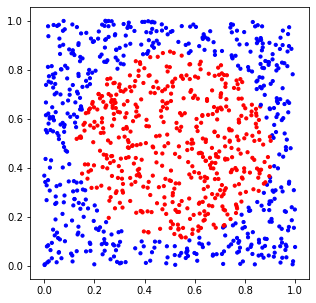

In [44]:
preds = MODEL_TRAINED(validation_data)
validation_labels = torch.max(preds, 1).indices

c = ["red" if l.item() == 1 else "blue" for l in validation_labels]

plt.figure(figsize=(5,5))
plt.scatter(validation_data[:,0], validation_data[:,1], s=10, c=c)
# plt.tight_layout()
plt.savefig("images/best_model.png")